<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Денис! Спасибо, что прислал задание:) Если ты дошел до данного анализа, то ты уже проделал большую работу над проектом в тренажере. Давай завершим исследование посредством инструментов Python. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Аналитика в авиакомпании

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**Описание данных**

1. /datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
    * model — модели самолета
    * flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

2. /datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
    * city — городах
    * average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

### Импорт файлов и изучение информации

In [1]:
#вызовем библиотеки, необходимые для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#импортируем файлы и изучим данные в них
aircrafts = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

display(aircrafts)
aircrafts.info()

display(cities.head())
cities.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Вывод**

В представленных наборах данных проблем не выявлено, пропуски отсутствуют, тип данных соответствует значениям. 
В таблице с информацией о городах и количестве прибывающих рейсов (cities) необходимо округлить значения со средним колиечеством рейсов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Первый взгляд на таблицы выполнен. В этот раз с ними все хорошо, предобработка не требуется. Раз уж с ними все так хорошо, то предлагаю их несколько оптимизировать. Видим, что в `average_fligts` довольно небольшие вещественные цисла. Можно поменять формат для этого поля с `float64` на, например `float16`. Данное действие позволит нам уменьшить объем занимаемой памяти в 4 раза для данного параметра. 

</div>

### Исследовательский анализ данных

Text(0.5, 1.0, 'Количество рейсов разных моделей самолетов')

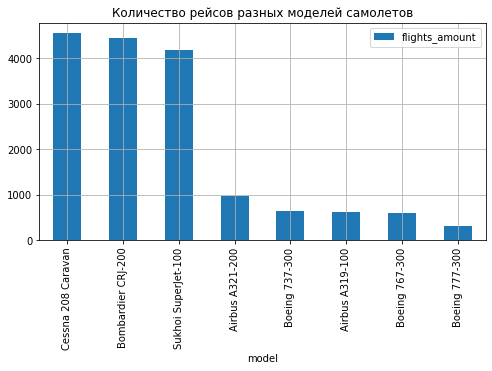

In [2]:
#построим графики: модели самолетов и количество рейсов
aircrafts = aircrafts.sort_values(by = 'flights_amount', ascending = False)
aircrafts.plot(x = 'model', y = 'flights_amount', kind = 'bar', legend = True, figsize=(8, 4), grid = True)
plt.title('Количество рейсов разных моделей самолетов')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между самолетами. Старайся не только описывать результат, но и трактовать его. 

</div>

Text(0.5, 1.0, 'Количество прибывающих рейсов в разные города')

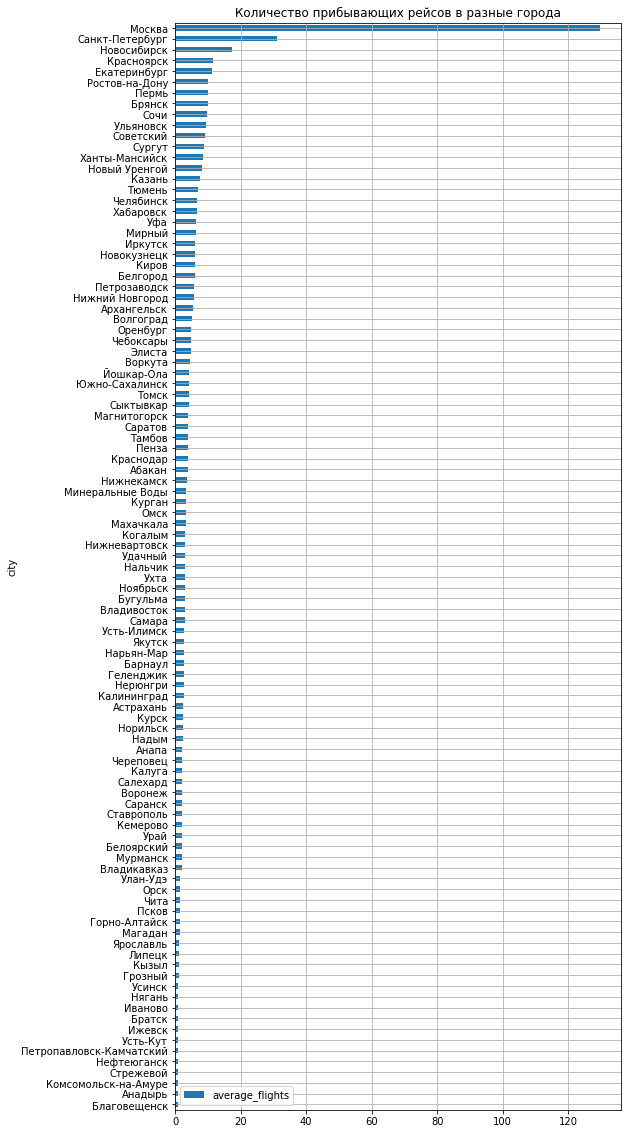

In [3]:
#построить графики: города и количество рейсов
cities = cities.sort_values(by = 'average_flights', ascending = True)
cities.plot(x = 'city', y = 'average_flights', kind = 'barh', legend = True, figsize=(8, 20), grid = True)
plt.title('Количество прибывающих рейсов в разные города')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, что сам рисунок сделан горизонтальным. Иначе читать названия городов было бы довольно неудобно. Правильно, что ты провел сортировку городов по убыванию числоа полетов. Так нам легче сравнивать города между собой. 

</div>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,city,average_flights
43,Москва,130
70,Санкт-Петербург,32
54,Новосибирск,18
33,Красноярск,12
20,Екатеринбург,12
67,Ростов-на-Дону,11
63,Пермь,11
10,Брянск,10
74,Сочи,10
84,Ульяновск,10


Text(0.5, 1.0, 'Количество прибывающих рейсов в разные города. ТОП-10')

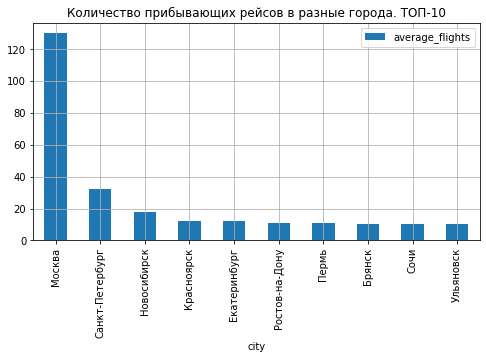

In [4]:
#выберем топ-10 городов по количеству рейсов
cities = cities.sort_values(by = 'average_flights', ascending= False)
cities.head(10)
cities_top = cities.query('average_flights > 9.58')
cities_top['average_flights'] = cities_top['average_flights'].apply(np.ceil).astype('int')
display(cities_top)
cities_top.plot(x = 'city', y = 'average_flights', kind = 'bar', legend = True, figsize=(8, 4), grid = True)
plt.title('Количество прибывающих рейсов в разные города. ТОП-10')


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

График также стоит повернуть, поскольку названия слишком длинные для того, чтобы отобразить их по оси X.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь, почему мы имеем такой результат? Почему, например, Новосибирск занимает 3 строчку?

</div>

**Общий вывод**
Изучив наборы данных, можно сделать следующие выводы:
1. По количеству рейсов лидируют с большим отрывом 3 модели: Сессна 208, Бомбардир 200 и Сухой СуперДжет 100. Все три самолета не являются дальнемагистральными моделями и имеют небольшое количество посадочных мест и предназначены в большей степени для региональныхъ перевозок. Высокая частота рейсов может свидетельствовать о следующем: данные модели являются недорогими и их доля в парке авиакомпаниий может быть значительной, из-за малого радиуса полета такие самолеты могут совершать более дешевые, а следовательно более частые рейсы. 
2. По количеству рейсов лидируют три города: Москва, Санкт-Петербург и Новосибирск. Это явялется ожидаемым результатом, так как это три крупнейших города в РФ, соответственно имеют больший пассажиропоток. Также аэропорты этих городов являчются хабами для крупных федеральных авиакомпаний, в которых, как правило, проивзодиться стыковка между рейсами.
3. Среди ТОП-10 городов первые семь мест занимают города-миллионики, которые имеют потенциально высокий пассажиропоток. На 9 месте асположился город Сочи, который является центром курортного региона. Возникают вопросы по количеству рейсов в Брянск и Ульяновск. Возможно, это связано с тем, что аэропорты этих городов являются единственными на территории и обслуживают пассажиров из соседних регионов: http://www.ruwings.ru/airport/map.php.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. Здесь ты высказал те предположегтя, которые хотелось бы видеть выше по каждому пункту анализа. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Проект выполнен хорошо, молодец. Ты здорово поработал! Но расслабляться не стоит. Далее тебя ждет один из самых сложных проектов курса. Проходи тренажер очень внимательно. Успехов в дальнейших проектах :)

</div>